In [34]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../modules')
from clustering_questions import *

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df= pd.read_csv("../data/df_reponses.csv", index_col = "node_id")
df

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [27]:
# On ne garde que les textes qui apparaissent chez au moins 10% des clients
clust = pd.read_csv("../data/clust.csv", low_memory = False)
compte=pd.DataFrame(clust.sum(axis=0)).iloc[1:,:].sort_values(by=[0])
#On a 443 clients donc on cherche à supprimer les textes qui apparaissent chez moins de 10% des clients soit moins de 44 fois
compte.columns=['nombre']
liste_texte_oui=list(compte.loc[compte['nombre']>=44].index)

txt_client = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)

txt_client = txt_client.loc[txt_client["txt_version_surrogate_uuid"].isin(liste_texte_oui)]

1
2
3
4
5
6
7
8
9
10
[0.17199477610131694, 0.17953692741707236, 0.187667481140352, 0.20625004402766764, 0.22226946332440237, 0.2340899025880054, 0.24288860550762842, 0.25431652107850805, 0.2615687240141013, 0.2767308387326784] [1.0, 0.9990599447603704, 0.9953351893069938, 0.9920564354071881, 0.9890685528183147, 0.9811780292559251, 0.9830083114798146, 0.9400232579408817, 0.9310120236859267, 0.90028008378914] [0.2851648148532095, 0.2952390685441858, 0.3062533158725066, 0.33108486183752345, 0.3501183086550864, 0.3633679659446789, 0.3733974746248336, 0.37720175032192405, 0.386796664261065, 0.3943124177561979]


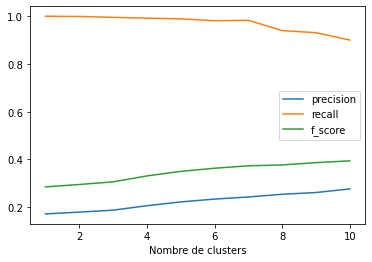

In [36]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

1
2
3
4
5
6
7
8
9
10
[0.17145830451524346, 0.18311806112018567, 0.19486199558372938, 0.20847722043437403, 0.21739854454773005, 0.22765608770735854, 0.23686986787815498, 0.2535542055455108, 0.26093040633674974, 0.259274648472994] [1.0, 0.9996555367271216, 0.9980523054121417, 0.9941526013131352, 0.9876261057782749, 0.9866715033816443, 0.9879884453628076, 0.9798502456695648, 0.951387712241913, 0.9593270029598894] [0.2844203280051261, 0.30073440840768545, 0.31692044329070895, 0.3339036881829009, 0.3449078724421904, 0.3566728047018176, 0.3680713489389849, 0.38534509086288987, 0.3859514052245268, 0.38361167028021254]


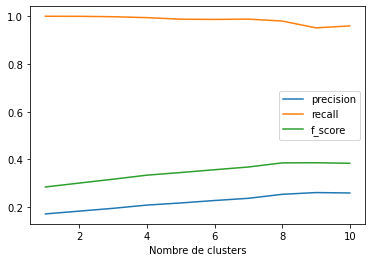

In [37]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=True)